# Detección de Bordes
- Cambios en la intensidad serán los bordes de las imágenes
- Sobel: Mejor para detectar bordes horizontales y verticales
- Laplaciano: Mejor para detectar bordes diagonales

![img](../images/vector.png)
![img](../images/vector2.png)
![img](../images/vector3.png)

__Estas máscaras son muy sensibles al ruido!!__ Solución: Filtrar el ruido antes de detectar los bordes (Operador de Sobel)

![img](../images/vector4.png)

![img](../images/vector5.png)

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## SOBEL

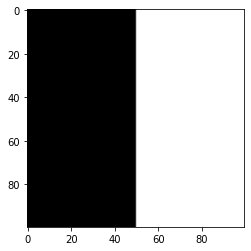

In [107]:
# Matriz de 0s
a = np.zeros((100,50))
# Matriz de 1s
b = np.ones((100,50))
# Imagen de prueba
img = np.uint8(255*np.concatenate((a,b), axis=1))
plt.imshow(img, cmap='gray');

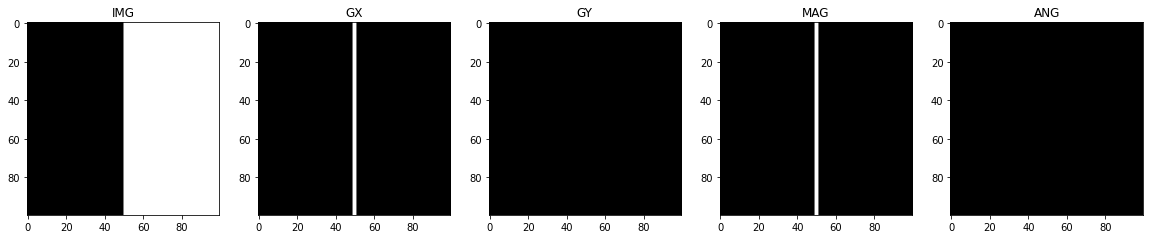

In [108]:
# Matriz de 0s
a = np.zeros((100,50))
# Matriz de 1s
b = np.ones((100,50))
# Imagen de prueba
img = np.uint8(255*np.concatenate((a,b), axis=1))
# gx: Detectar bordes verticales
gx = cv2.Sobel(img, cv2.CV_64F,1,0,5)
# gy: Detectar bordes horinzontales
gy = cv2.Sobel(img, cv2.CV_64F,0,1,5)
# Pasamos de cartersianas a polar
mag, ang = cv2.cartToPolar(gx, gy)
# Escala entre 0 y 255 y en valor absoluto
gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)
mag = cv2.convertScaleAbs(mag)
# Pasamos a grados el ángulo del vector gradiente
ang = (180/np.pi)*ang

# Mostramos Resultados
fig, axs = plt.subplots(1,5, figsize=(20, 20))
axs[0].title.set_text('IMG')
axs[1].title.set_text('GX')
axs[2].title.set_text('GY')
axs[3].title.set_text('MAG')
axs[4].title.set_text('ANG')
axs[0].imshow(img, cmap='gray');
axs[1].imshow(gx, cmap='gray');
axs[2].imshow(gy, cmap='gray');
axs[3].imshow(mag, cmap='gray');
axs[4].imshow(ang, cmap='gray');

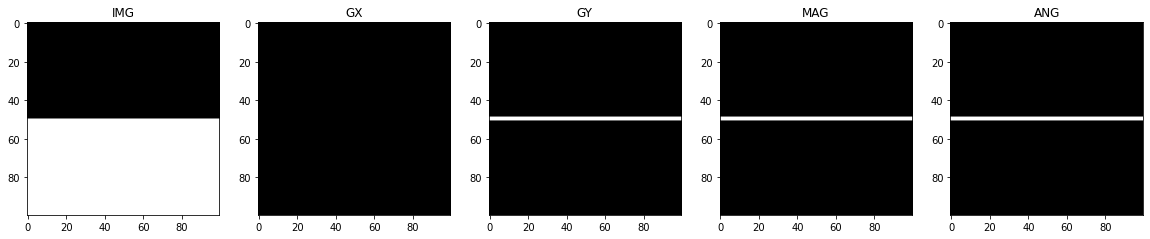

In [109]:
# Matriz de 0s
a = np.zeros((50,100))
# Matriz de 1s
b = np.ones((50,100))
# Imagen de prueba
img = np.uint8(255*np.concatenate((a,b), axis=0))
# gx: Detectar bordes verticales
gx = cv2.Sobel(img, cv2.CV_64F,1,0,5)
# gy: Detectar bordes horinzontales
gy = cv2.Sobel(img, cv2.CV_64F,0,1,5)
# Pasamos de cartersianas a polar
mag, ang = cv2.cartToPolar(gx, gy)
# Escala entre 0 y 255 y en valor absoluto
gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)
mag = cv2.convertScaleAbs(mag)
# Pasamos a grados el ángulo del vector gradiente
ang = (180/np.pi)*ang

# Mostramos Resultados
fig, axs = plt.subplots(1,5, figsize=(20, 20))
axs[0].title.set_text('IMG')
axs[1].title.set_text('GX')
axs[2].title.set_text('GY')
axs[3].title.set_text('MAG')
axs[4].title.set_text('ANG')
axs[0].imshow(img, cmap='gray');
axs[1].imshow(gx, cmap='gray');
axs[2].imshow(gy, cmap='gray');
axs[3].imshow(mag, cmap='gray');
axs[4].imshow(ang, cmap='gray');

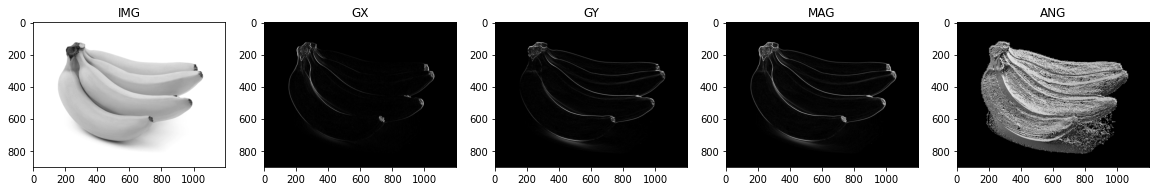

In [110]:
# cv2.imread('../images/bananos.jpg',0) el 0 nos lo pasa directamente a ESCALA DE GRISES
img = cv2.imread('../images/bananos.jpg',0)
# gx: Detectar bordes verticales
gx = cv2.Sobel(img, cv2.CV_64F,1,0,5)
# gy: Detectar bordes horinzontales
gy = cv2.Sobel(img, cv2.CV_64F,0,1,5)
# Pasamos de cartersianas a polar
mag, ang = cv2.cartToPolar(gx, gy)
# Escala entre 0 y 255 y en valor absoluto
gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)
mag = cv2.convertScaleAbs(mag)
# Pasamos a grados el ángulo del vector gradiente
ang = (180/np.pi)*ang

# Mostramos Resultados
fig, axs = plt.subplots(1,5, figsize=(20, 20))
axs[0].title.set_text('IMG')
axs[1].title.set_text('GX')
axs[2].title.set_text('GY')
axs[3].title.set_text('MAG')
axs[4].title.set_text('ANG')
axs[0].imshow(img, cmap='gray');
axs[1].imshow(gx, cmap='gray');
axs[2].imshow(gy, cmap='gray');
axs[3].imshow(mag, cmap='gray');
axs[4].imshow(ang, cmap='gray');

## LAPLACIAN

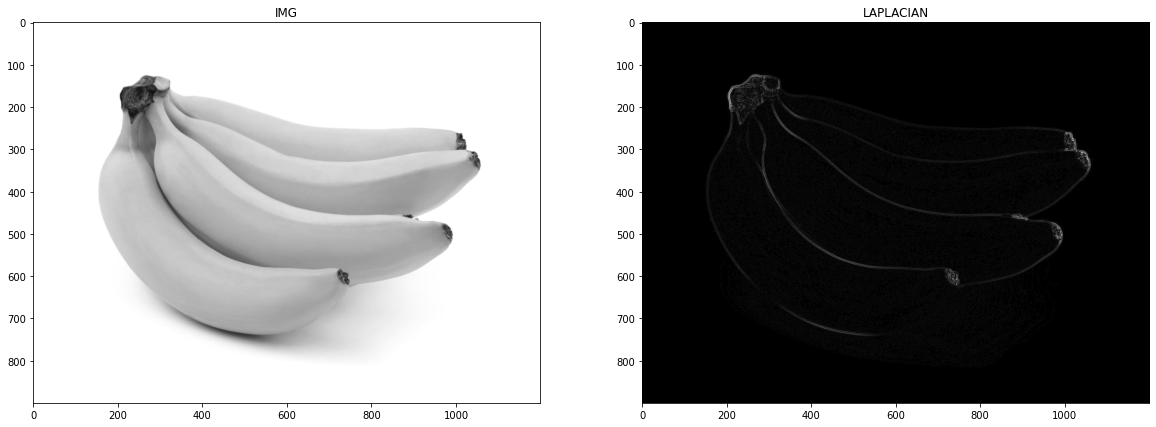

In [111]:
imgFilt = cv2.GaussianBlur(img, (5,5), 0)
lap = cv2.convertScaleAbs(cv2.Laplacian(imgFilt, cv2.CV_64F, 5))
# Mostramos Resultados
fig, axs = plt.subplots(1,2, figsize=(20, 20))
axs[0].title.set_text('IMG')
axs[1].title.set_text('LAPLACIAN')
axs[0].imshow(img, cmap='gray');
axs[1].imshow(lap, cmap='gray');

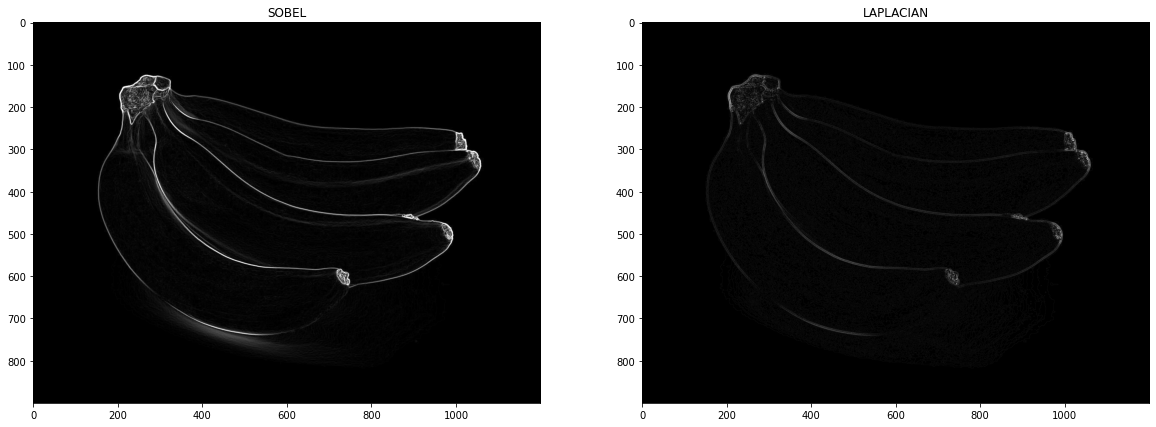

In [112]:
# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,2, figsize=(20, 20))
axs[0].title.set_text('SOBEL')
axs[1].title.set_text('LAPLACIAN')
axs[0].imshow(mag, cmap='gray');
axs[1].imshow(lap, cmap='gray');

## Algoritmo de Canny

Etapas:

- Reducción de ruido: mediante __filtro gaussiano__
- Obtener Magnitud y ángulo del gradiente a partir del __Operador de Sobel__
- __Suprimir los píxeles no máximos__ para adelgazar los bordes gruesos
- __Doble umbralización__: diferenciar los píxeles no relevantes de los que no son relevantes
            - Blanco si es seguro que es un borde (255 si Intensidad del píxel >= Threshold High)
            - Gris si puede que sea un borde (50 si Threshold Low < Intensidad del píxel < Threshold High)
            - Negro si no es un borde (0 si Intensidad del píxel <= Threshold Low)
- Identificación de posibles bordes con la __histéresis__
            - Si un píxel es gris (posible borde), se chequea si el píxel vecino es blanco (borde) entonces el píxel gris se pinta en blanco, en caso contrario se pinta en negro

El resultado es una imagen binaria con los bordes marcados

__Bordes_canny = cv2.Canny(img, Threshold_low, Threshold_high)__

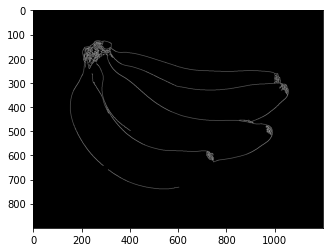

In [113]:
canny = cv2.Canny(img, threshold1=25, threshold2=150)
plt.imshow(canny, cmap='gray');

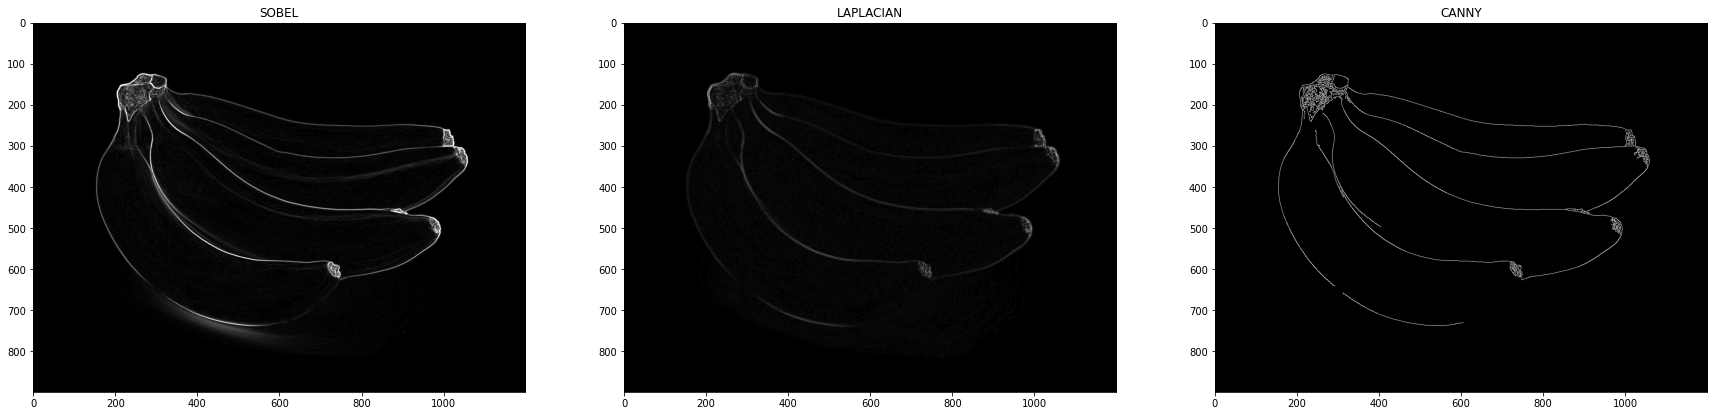

In [114]:
# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(30, 30))
axs[0].title.set_text('SOBEL')
axs[1].title.set_text('LAPLACIAN')
axs[2].title.set_text('CANNY')
axs[0].imshow(mag, cmap='gray');
axs[1].imshow(lap, cmap='gray');
axs[2].imshow(canny, cmap='gray');

## Segmentación Objetos con Algoritmo de Canny

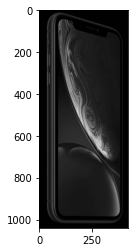

In [115]:
# cv2.imread('../images/bananos.jpg',0) el 0 nos lo pasa directamente a ESCALA DE GRISES
img = cv2.imread('../images/iphone.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray');

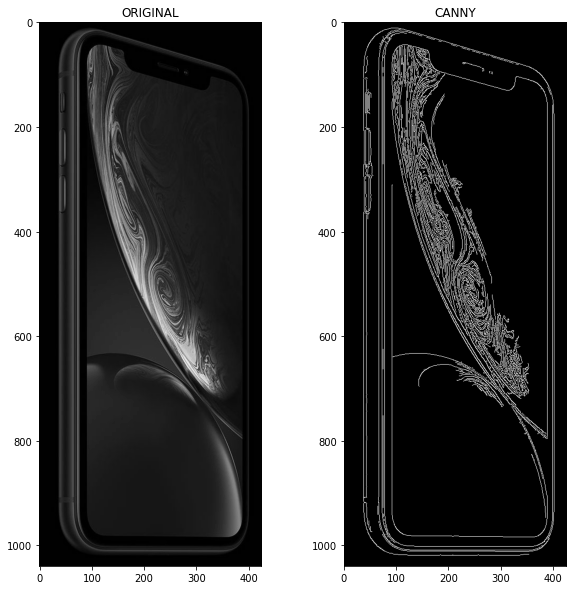

In [116]:
canny = cv2.Canny(img_gray, 25,150)
# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,2, figsize=(10, 10))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('CANNY')
axs[0].imshow(img_gray, cmap='gray');
axs[1].imshow(canny, cmap='gray');

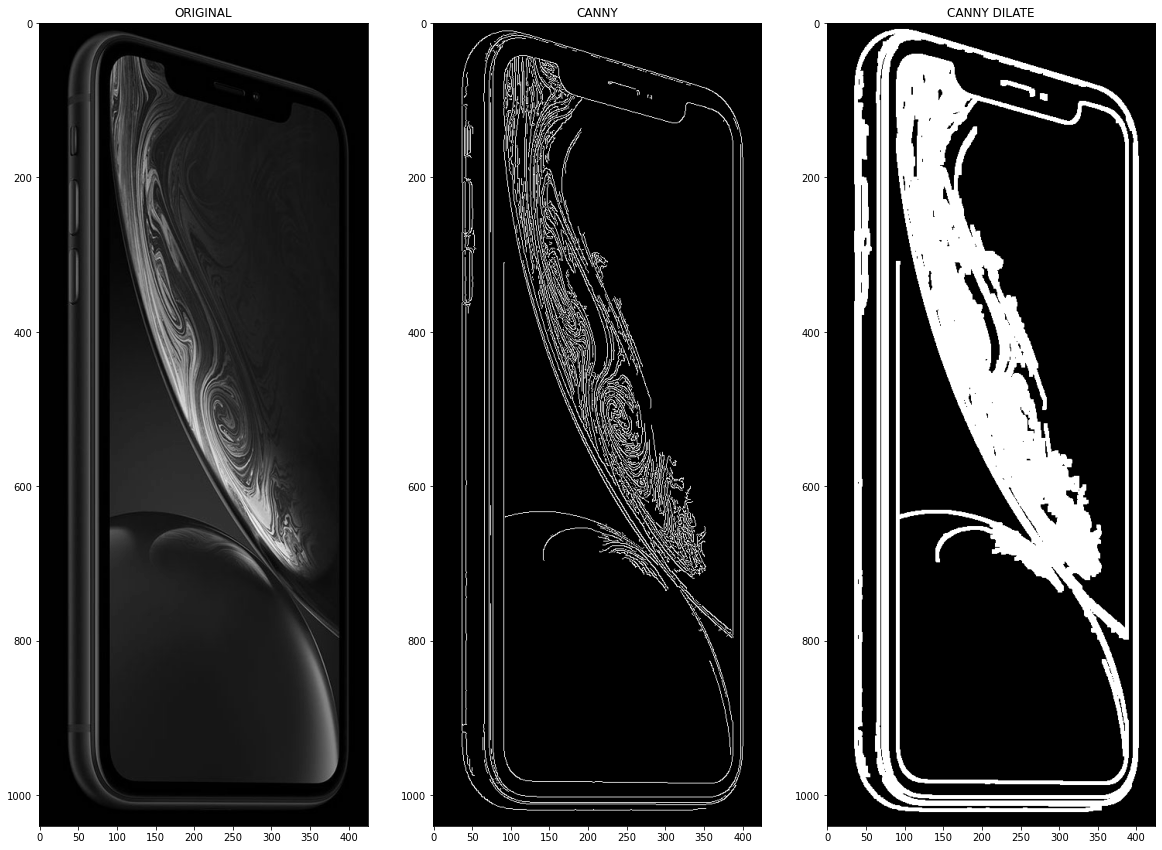

In [117]:
# Ampliamos un poco los bordes del objeto, DILATACIÓN
kernel =np.ones((5,5), np.uint8)
bordes = cv2.dilate(canny, kernel)

# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(20, 20))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('CANNY')
axs[2].title.set_text('CANNY DILATE')
axs[0].imshow(img_gray, cmap='gray');
axs[1].imshow(canny, cmap='gray');
axs[2].imshow(bordes, cmap='gray');

In [118]:
# Generamos la máscara
contours,_ = cv2.findContours(bordes,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objetos = bordes.copy()
cv2.drawContours(objetos, [max(contours, key=cv2.contourArea)],-1,255,thickness=-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

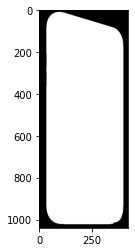

In [119]:
plt.imshow(objetos, cmap='gray');

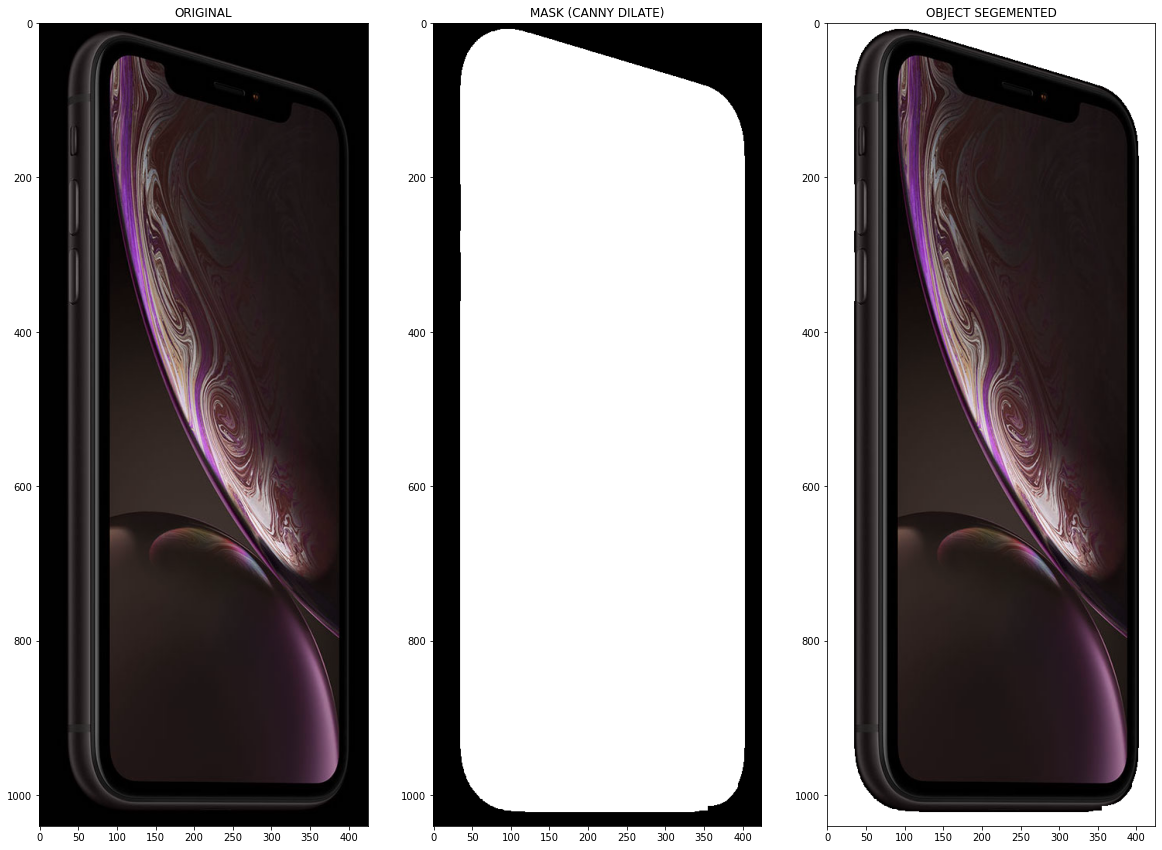

In [120]:
objetos = objetos/255
seg = np.zeros(img.shape)
seg[:,:,0] = objetos*img[:,:,0]+255*(objetos==0)
seg[:,:,1] = objetos*img[:,:,1]+255*(objetos==0)
seg[:,:,2] = objetos*img[:,:,2]+255*(objetos==0)
seg = np.uint8(seg)

# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(20, 20))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('MASK (CANNY DILATE)')
axs[2].title.set_text('OBJECT SEGEMENTED')
axs[0].imshow(img);
axs[1].imshow(objetos, cmap='gray');
axs[2].imshow(seg);

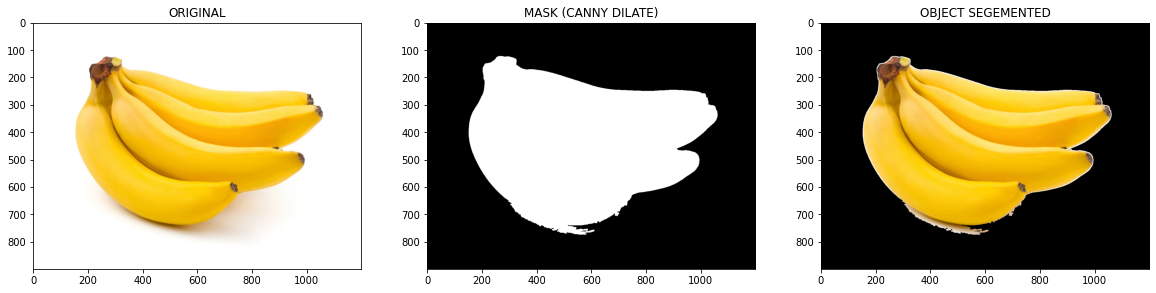

In [128]:
# Script
# cv2.imread('../images/bananos.jpg',0) el 0 nos lo pasa directamente a ESCALA DE GRISES
img = cv2.imread('../images/bananos.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

canny = cv2.Canny(img_gray, 5,40)
# Ampliamos un poco los bordes del objeto, DILATACIÓN
kernel =np.ones((5,5), np.uint8)
bordes = cv2.dilate(canny, kernel)
# Generamos la máscara
contours,_ = cv2.findContours(bordes,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objetos = bordes.copy()
cv2.drawContours(objetos, [max(contours, key=cv2.contourArea)],-1,255,thickness=-1)

objetos = objetos/255
seg = np.zeros(img.shape)
seg[:,:,0] = objetos*img[:,:,0]
seg[:,:,1] = objetos*img[:,:,1]
seg[:,:,2] = objetos*img[:,:,2]
seg = np.uint8(seg)

# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(20, 20))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('MASK (CANNY DILATE)')
axs[2].title.set_text('OBJECT SEGEMENTED')
axs[0].imshow(img);
axs[1].imshow(objetos, cmap='gray');
axs[2].imshow(seg);

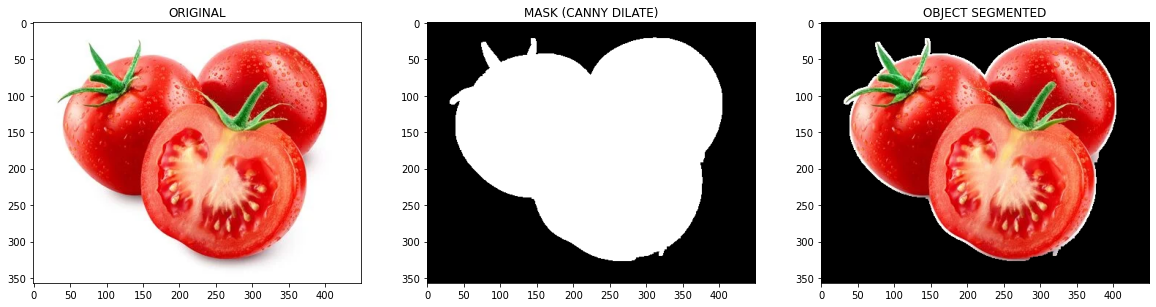

In [129]:
# Script
# cv2.imread('../images/bananos.jpg',0) el 0 nos lo pasa directamente a ESCALA DE GRISES
img = cv2.imread('../images/tomates.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

canny = cv2.Canny(img_gray, 25,150)
# Ampliamos un poco los bordes del objeto, DILATACIÓN
kernel =np.ones((5,5), np.uint8)
bordes = cv2.dilate(canny, kernel)
# Generamos la máscara
contours,_ = cv2.findContours(bordes,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objetos = bordes.copy()
cv2.drawContours(objetos, [max(contours, key=cv2.contourArea)],-1,255,thickness=-1)

objetos = objetos/255
seg = np.zeros(img.shape)
seg[:,:,0] = objetos*img[:,:,0]
seg[:,:,1] = objetos*img[:,:,1]
seg[:,:,2] = objetos*img[:,:,2]
seg = np.uint8(seg)

# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(20, 20))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('MASK (CANNY DILATE)')
axs[2].title.set_text('OBJECT SEGMENTED')
axs[0].imshow(img);
axs[1].imshow(objetos, cmap='gray');
axs[2].imshow(seg);